In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('wine_data.csv', header= None, usecols=[0,1,2])
df.columns = ['Class label','Alcohol','Malic Acid']

df.head()

,Class label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

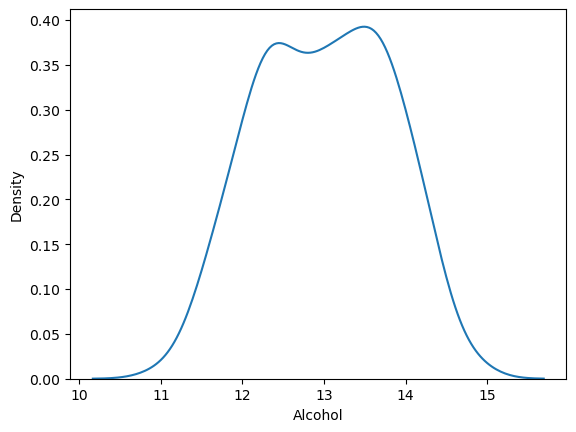

In [4]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

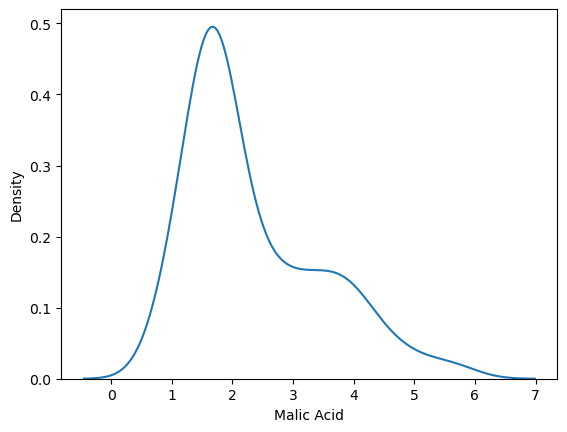

In [6]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

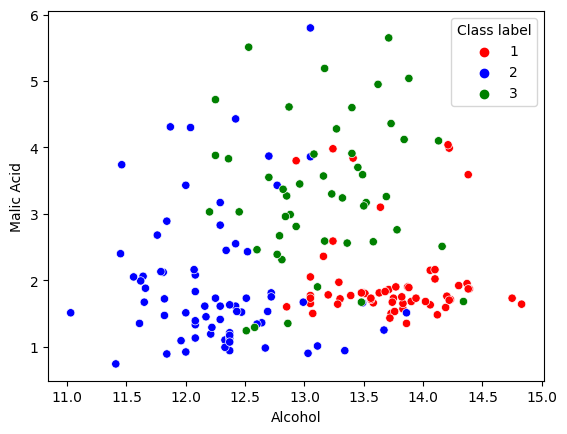

In [10]:
color_dict = {1: 'red', 3: 'green', 2: 'blue'}
sns.scatterplot(data= df, x='Alcohol', y='Malic Acid', hue='Class label', palette=color_dict)


In [11]:
x = df.drop('Class label', axis=1)
y = df['Class label']

In [12]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=42)

In [14]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((124, 2), (54, 2), (124,), (54,))

# Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(xtrain)


xtrain_scaled = scaler.transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [16]:
np.round(xtrain.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.3,1.6
50%,12.9,1.9
75%,13.7,3.2
max,14.8,5.8


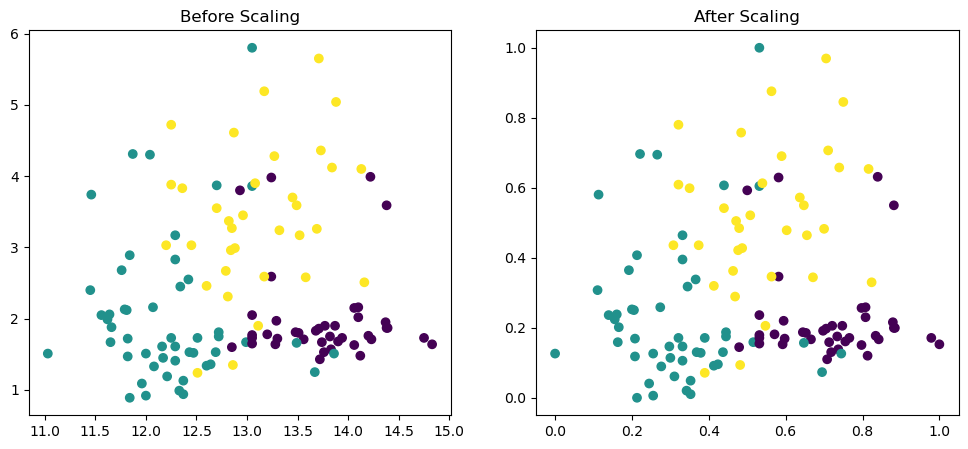

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Scatter plot before scaling
ax1.scatter(xtrain['Alcohol'], xtrain['Malic Acid'], c=ytrain)
ax1.set_title("Before Scaling")

# Scatter plot after scaling
ax2.scatter(xtrain_scaled[:, 0], xtrain_scaled[:, 1], c=ytrain)  # Assuming 'Alcohol' is the first column and 'Malic Acid' is the second column
ax2.set_title("After Scaling")

plt.show()


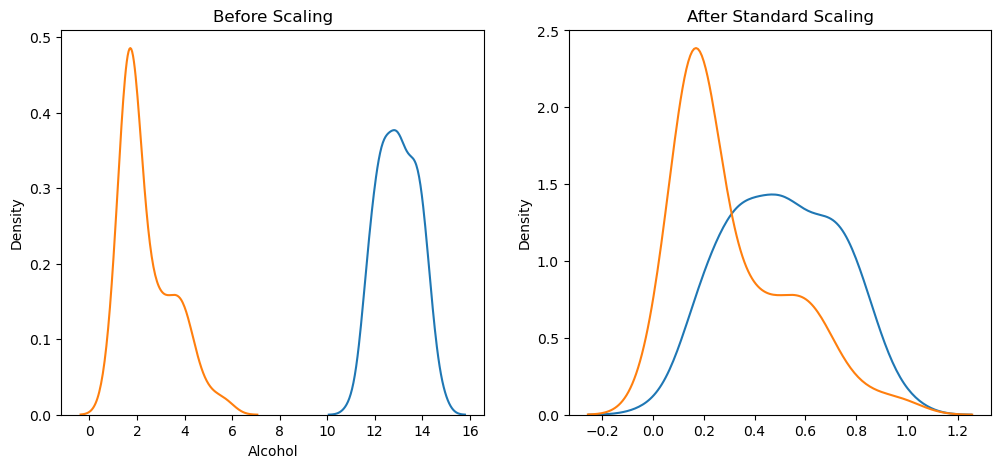

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Set titles for the subplots using set_title
ax1.set_title('Before Scaling')
sns.kdeplot(xtrain['Alcohol'], ax=ax1)
sns.kdeplot(xtrain['Malic Acid'], ax=ax1)

ax2.set_title('After Standard Scaling')
sns.kdeplot(xtrain_scaled[:, 0], ax=ax2)  # Assuming 'Alcohol' is the first column
sns.kdeplot(xtrain_scaled[:, 1], ax=ax2)  # Assuming 'Malic Acid' is the second column

plt.show()
